## Predict Risk Tolerance

### Objective:
- This project's main objective is to generate machine learning and/or deep learning models to predict a person's level of risk tolerance.
- Este projeto tem como objetivo principal gerar modelos de machine learning e/ou deep learning para predizer o nível de tolerância ao risco de uma pessoa.

### Data Origin:
- Dataset: https://www.federalreserve.gov/econres/scfindex.htm
The data is a dataset with financial information from the 2022 Survey of Consumer Finances (SCF) being the most recent survey conducted by the US Federal Reserve.
- Os dados são um conjunto de dados com informações financeiras da pesquisa de Finanças do Consumidor (SCF) de 2022 sendo a pesquisa mais recente realizada pelo Federal Reserve dos EUA.

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [2]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [3]:
# métricas de verificação
from scipy.stats import skew # verifica se a base do sino da distribuição normal está entre -2 e 2 que é o limite viável
from scipy.stats import kurtosis # verifica se o cume do sino da distribuição normal está entre -2 e 2 (limite viável)

In [4]:
# preparação e visualização de dados
from sklearn.preprocessing import StandardScaler 
                    # faz a padronização dos dados para melhorar a normalidade (média=0 e variância=1)
                    # sensível a outliers

from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame
import statsmodels.api as sm # estimativa de modelos estatísticos

from fc import fc_retira_outliers as rto # função que retira outliers

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [5]:
# carregando arquivo de dados de cotações financeiras
df_risk = pd.read_csv('dataset/SCFP2022.csv', sep=',')

In [6]:
# verificando o tamanho do arquivo conferindo a quantidade de linhas e colunas
df_risk.shape

(22975, 357)

In [7]:
# reconhecendo as variáveis disponíveis
df_risk.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22975 entries, 0 to 22974
Data columns (total 357 columns):
 #    Column         Dtype  
---   ------         -----  
 0    YY1            int64  
 1    Y1             int64  
 2    WGT            float64
 3    HHSEX          int64  
 4    AGE            int64  
 5    AGECL          int64  
 6    EDUC           int64  
 7    EDCL           int64  
 8    MARRIED        int64  
 9    KIDS           int64  
 10   LF             int64  
 11   LIFECL         int64  
 12   FAMSTRUCT      int64  
 13   RACECL         int64  
 14   RACECL4        int64  
 15   RACECL5        int64  
 16   RACECL_EX      int64  
 17   RACE           int64  
 18   OCCAT1         int64  
 19   OCCAT2         int64  
 20   INDCAT         int64  
 21   FOODHOME       int64  
 22   FOODAWAY       int64  
 23   FOODDELV       int64  
 24   RENT           float64
 25   INCOME         float64
 26   WAGEINC        float64
 27   BUSSEFARMINC   float64
 28   INTDIVINC     

In [8]:
# reconhecendo os dados do dataframe
df_risk.head(5)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.0,0.0,54.045591,0.0,37183.366733,0.0,4756.012024,38264.278557,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,

In [9]:
# verificando e confirmando colunas com nulos no dataframe
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

Series([], dtype: int64)

- Confirmamos que não tem nulos e fizemos isso com a função .isnull().sum() somando as ocorrências de valores nulos que existem no dataframe.

In [10]:
# verificando a duplicidade de alguma linha
df_risk.duplicated().sum()

0

- Verificamos que não há linhas duplicadas, o que nos dá uma vantagem pois teremos uma preservação do tamanho do dataframe nesse caso.

In [11]:
# apurando ativos arriscados e não arriscados 
df_risk['sem_risco']= \
	df_risk['LIQ'] + \
	df_risk['CDS'] + \
	df_risk['SAVBND'] + \
	df_risk['CASHLI'] 

df_risk['com_risco'] = \
	df_risk['NMMF'] + \
	df_risk['STOCKS'] + \
	df_risk['BOND']

In [12]:
# apurando a tolerância ao risco
df_risk['tolerancia_risco'] = df_risk['com_risco']/(df_risk['com_risco']+df_risk['sem_risco'])

In [13]:
print(df_risk.tolerancia_risco.head(20))

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.999819
11    0.999859
12    0.999862
13    0.999726
14    0.999762
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: tolerancia_risco, dtype: float64


In [14]:
# verificando e confirmando colunas com nulos no dataframe
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

tolerancia_risco    318
dtype: int64

In [15]:
# criando a feature risk, disposição em assumir risco (de 4 a 1 crescente)
def classifica_risco(tolerancia_risco):
    if tolerancia_risco > 0.75: return 1
    elif tolerancia_risco > 0.50: return 2
    elif tolerancia_risco > 0.25: return 3
    else: return 4

In [16]:
# criando a feature risk, disposição em assumir risco (de 4 a 1 crescente)
df_risk['RISK'] = df_risk['tolerancia_risco'].apply(classifica_risco)

In [17]:
# verificando os riscos criados
df_risk.RISK.value_counts()

RISK
4    16139
1     3791
2     1676
3     1369
Name: count, dtype: int64

In [18]:
df_risk.head(5)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,sem_risco,com_risco,tolerancia_risco,RISK
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1,13100,0,0.0,4
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.0,0.0,54.045591,0.0,37183.366733,0.0,4756.012024,38264.278

In [19]:
df_risk.shape

(22975, 361)

In [20]:
# apagando as linhas com nulos
df_risk = df_risk.dropna(axis=0)

In [21]:
df_risk.shape

(22657, 361)

In [22]:
# verificando e confirmando colunas com nulos no dataframe
df_risk.isnull().sum()[df_risk.isnull().sum()>0]

Series([], dtype: int64)

<Axes: xlabel='tolerancia_risco'>

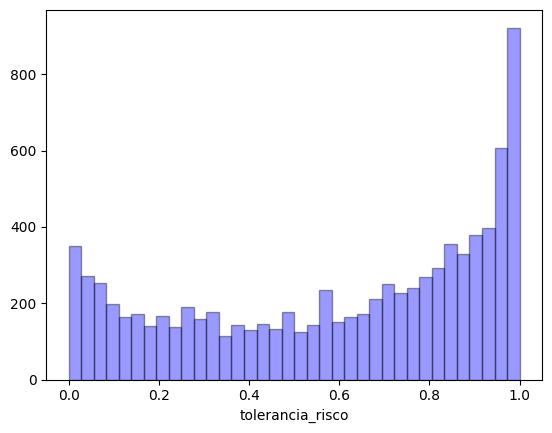

In [23]:
sns.distplot(df_risk['tolerancia_risco'][df_risk['tolerancia_risco']>0], hist=True, kde=False, bins=int(180/5), \
             color = 'blue', hist_kws={'edgecolor':'black'})

In [24]:
# seleciona features especificas para o estudo
lista_manter = ['tolerancia_risco', 'AGE','EDCL','MARRIED','KIDS','OCCAT1','INCOME', 'RISK','NETWORTH'] 
lista_apagar = [col for col in df_risk.columns if col not in lista_manter] 
df_risk_ok = df_risk
df_risk_ok.drop(labels=lista_apagar, axis=1, inplace=True)

In [25]:
df_risk_ok.head(5)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK
0,70,3,2,2,3,38804.734469,762100.0,0.0,4
1,70,3,2,2,3,38264.278557,854300.0,0.0,4
2,70,3,2,2,3,36102.454910,678200.0,0.0,4
3,70,3,2,2,3,33508.266533,279600.0,0.0,4
4,70,3,2,2,3,35561.998998,602600.0,0.0,4


<Axes: title={'center': 'Correlation Matrix'}>

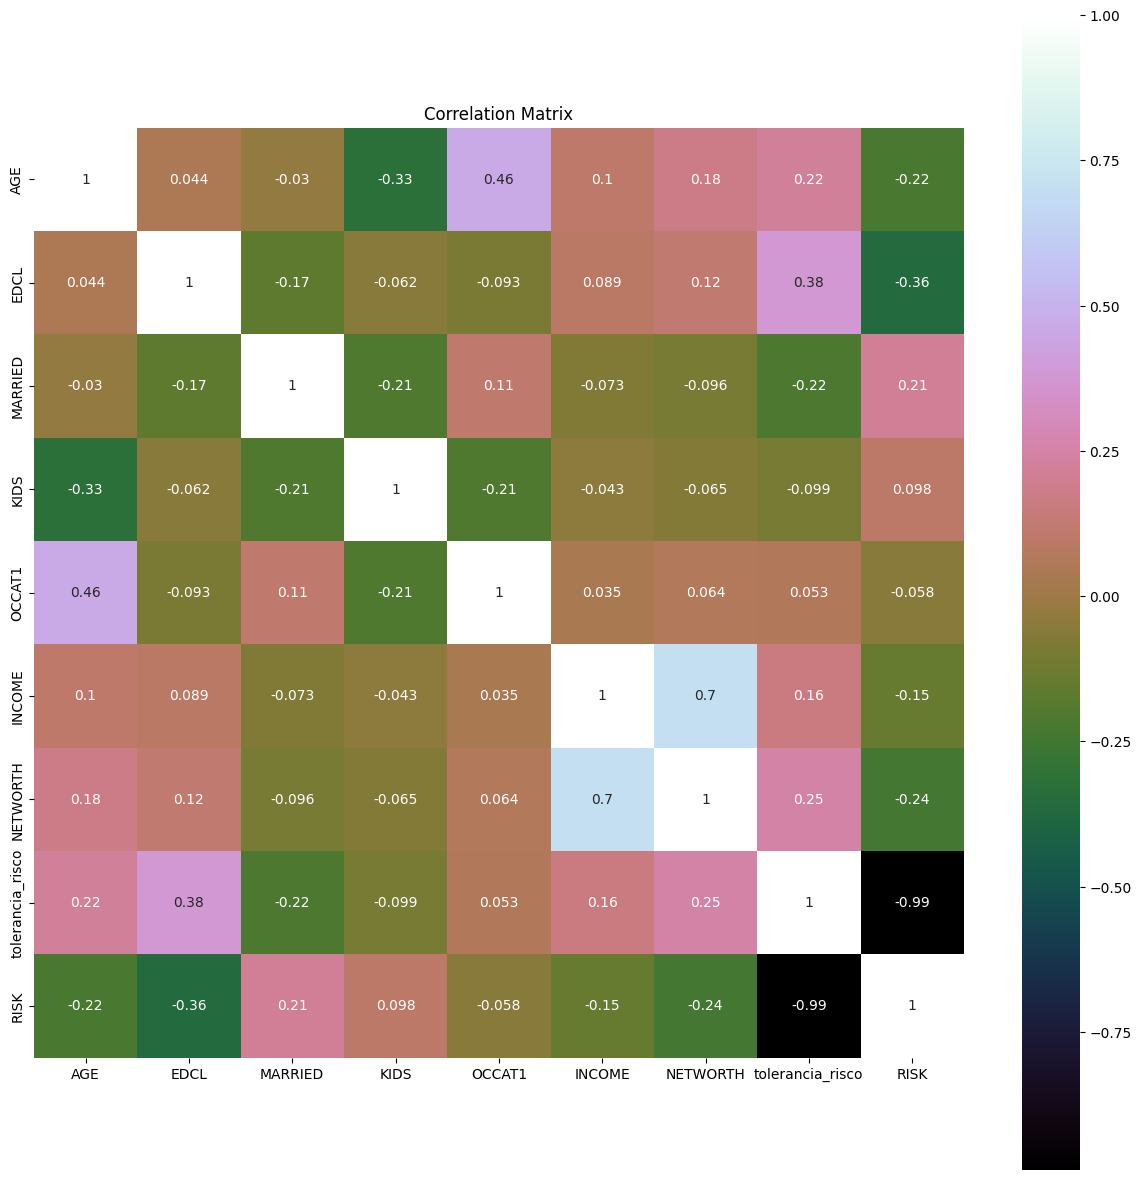

In [26]:
# correlação
correlation = df_risk_ok.corr()
pyplot.figure(figsize=(15,15)) 
pyplot.title('Correlation Matrix') 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [27]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_risk_ok.sort_index().to_csv('df_treated/df_risk_tolerance.csv', index=False)